<h1 align=center><font size="4"> Customer churn prediction: Predicting whether a customer will change telco provider</font></h1>

<h1 align=center><font size="2"> Author: Shahzaib S. Warraich </font></h1>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Loading the training dataset</a></li>
        <li><a href="#evaluation">Data wrangling and exploratory data analysis</a></li>
         <li><a href="#evaluation">Model training and evaluation</a></li>
         <li><a href="#evaluation">Loading the testing dataset</a></li>
         <li><a href="#evaluation">Churn evaluation</a></li>
        
        
       
    
</div>
<br>
<hr>


<h2 id="load_dataset">1. Loading the training dataset</h2>




|Field name|Description|
|--- |--- |
|State|string. 2-letter code of the US state of customer residence|
|account_length|numerical. Number of months the customer has been with the current telco provider|
|area_code|string="area_code_AAA" where AAA = 3 digit area code.|
|International_plan|(yes/no). The customer has international plan.|
|Voice_mail_plan|(yes/no). The customer has voice mail plan.|
|number_vmail_messages|numerical. Number of voice-mail messages.|
|total_day_minutes|numerical. Total minutes of day calls|
|total_day_calls|numerical. Total number of day calls.|
|total_day_charge|numerical. Total charge of day calls.|
|total_eve_minutes| numerical. Total minutes of evening call|
|total_eve_calls|numerical. Total number of evening calls.|
|total_eve_charge|numerical. Total charge of evening calls.|
|total_night_minutes|numerical. Total minutes of night calls.|
|total_night_calls|numerical. Total number of night calls.|
|total_night_charge|numerical. Total charge of night calls.|
|total_intl_minutes|numerical. Total minutes of international calls.|
|total_intl_calls|numerical. Total number of international calls|
|total_intl_charge|numerical. Total charge of international calls|
|number_customer_service_calls|numerical. Number of calls to customer service|
|churn|(yes/no). Customer churn - target variable.|


In [135]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [136]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [137]:
df.shape

(4250, 20)

In [138]:
df.dropna(inplace=True)
df.shape

(4250, 20)

In [139]:
df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

<h2 id="load_dataset">2. Data wrangling and exploratory data analysis</h2>

In [140]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [141]:
#Converting the yes/no fields to discrete form for modelling

from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()
df['international_plan']=number.fit_transform(df['international_plan'].astype('str'))
df['voice_mail_plan']=number.fit_transform(df['voice_mail_plan'].astype('str'))
df['churn']=number.fit_transform(df['churn'].astype('str'))

df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
6,LA,117,area_code_408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
7,WV,141,area_code_415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
8,IN,65,area_code_415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
9,RI,74,area_code_415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


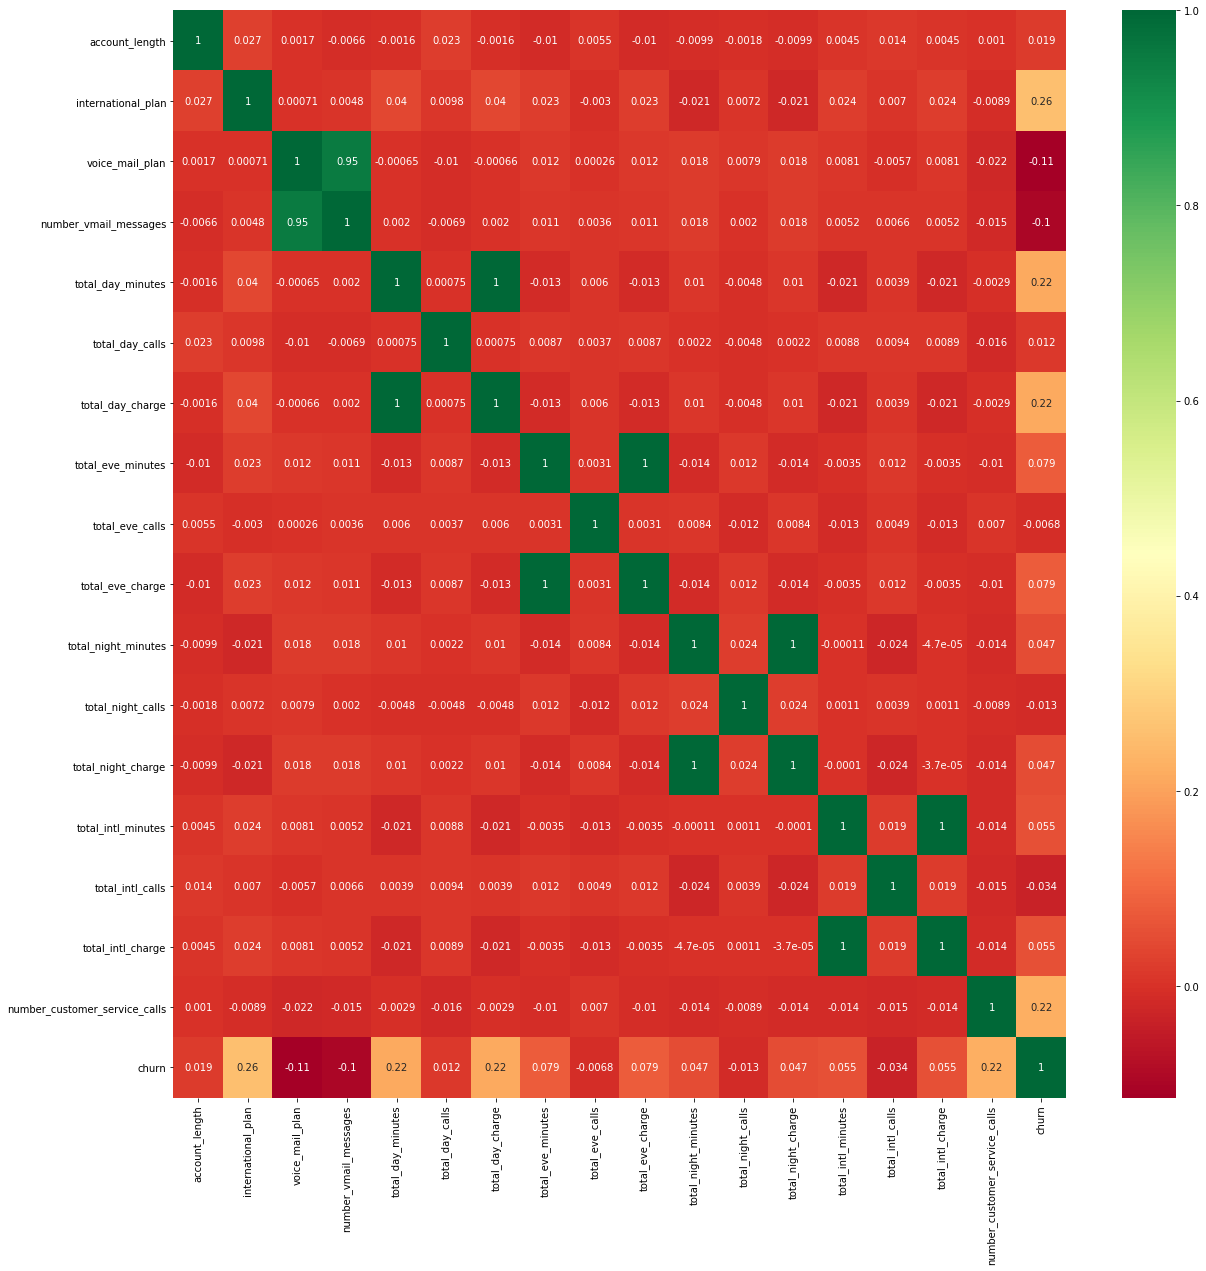

In [142]:
#get correlations of each feature in dataset

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [143]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [144]:
import plotly.express as px 
import numpy as np
  
fig = px.pie(df, values="international_plan", names="churn", 
             title='International plan customer churn')  
fig.show()

In [145]:
fig = px.pie(df, values="voice_mail_plan", names="churn", 
             title='Voice mail plan customer churn')  
fig.show()

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the customer churn. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>international_plan</li>
    <li>total_day_minutes</li>
    <li>total_day_charge</li>
    <li>number_customer_service_calls</li>
    <li>voice_mail_plan</li>
    
   
</ul>
    


<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

<h2 id="load_dataset">3. Model training and evaluation</h2>

In [146]:
X= df[['international_plan','total_day_minutes','total_day_charge','number_customer_service_calls','voice_mail_plan']].values
X[0:20]      

array([[  0.  , 161.6 ,  27.47,   1.  ,   1.  ],
       [  0.  , 243.4 ,  41.38,   0.  ,   0.  ],
       [  1.  , 299.4 ,  50.9 ,   2.  ,   0.  ],
       [  1.  , 166.7 ,  28.34,   3.  ,   0.  ],
       [  0.  , 218.2 ,  37.09,   3.  ,   1.  ],
       [  1.  , 157.  ,  26.69,   0.  ,   0.  ],
       [  0.  , 184.5 ,  31.37,   1.  ,   0.  ],
       [  1.  , 258.6 ,  43.96,   0.  ,   1.  ],
       [  0.  , 129.1 ,  21.95,   4.  ,   0.  ],
       [  0.  , 187.7 ,  31.91,   0.  ,   0.  ],
       [  0.  , 128.8 ,  21.9 ,   1.  ,   0.  ],
       [  0.  , 156.6 ,  26.62,   3.  ,   0.  ],
       [  0.  , 332.9 ,  56.59,   4.  ,   0.  ],
       [  0.  , 196.4 ,  33.39,   1.  ,   1.  ],
       [  0.  , 189.7 ,  32.25,   1.  ,   1.  ],
       [  0.  , 224.4 ,  38.15,   1.  ,   0.  ],
       [  0.  , 155.1 ,  26.37,   0.  ,   0.  ],
       [  0.  ,  62.4 ,  10.61,   5.  ,   0.  ],
       [  0.  , 183.  ,  31.11,   0.  ,   0.  ],
       [  0.  , 110.4 ,  18.77,   2.  ,   0.  ]])

In [147]:
y = df['churn'].values
y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [148]:
from sklearn import preprocessing

#normalize data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.32054702, -0.34550964, -0.3457877 , -0.42634613,  1.67986382],
       [-0.32054702,  1.16913636,  1.1692952 , -1.1889602 , -0.59528635],
       [ 3.11966717,  2.20605783,  2.20621751,  0.33626795, -0.59528635],
       [ 3.11966717, -0.25107572, -0.25102695,  1.09888202, -0.59528635],
       [-0.32054702,  0.7025217 ,  0.70202664,  1.09888202,  1.67986382]])

This is a supervised learning (classification) use case. Hence, we'll be using the following algorithms to train our model:
- K Nearest Neighbor (KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Random Forest
- Naive Bayes

In [149]:
from sklearn.model_selection import train_test_split

#Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3400, 5) (3400,)
Test set: (850, 5) (850,)


## K Nearest Neighbor(KNN)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

#Identifying the best number of neighbours

from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.87176471, 0.90352941, 0.90941176, 0.90705882, 0.91176471,
       0.91058824, 0.91058824, 0.91411765, 0.91529412])

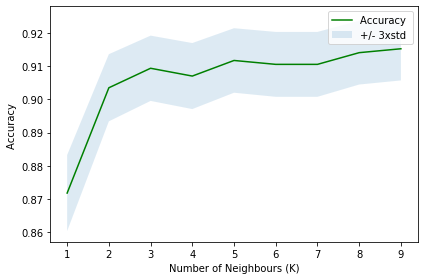

Best accuracy: 0.9152941176470588 k= 9


In [151]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.15)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

In [152]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [153]:
from sklearn import metrics

nhat=neigh.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, nhat))

Test set Accuracy:  0.9152941176470588


In [154]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

print("The jaccard score is", jaccard_similarity_score(y_test, nhat))
print('The F1 score is', f1_score(y_test, nhat, average='weighted'))

The jaccard score is 0.9152941176470588
The F1 score is 0.910289046653144


E:\2020v Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



## Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_train,y_train)
Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [156]:
That=Tree.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, That))

Test set Accuracy:  0.9141176470588235


In [157]:
print("The jaccard score is", jaccard_similarity_score(y_test, That))
print('The F1 score is', f1_score(y_test, That, average='weighted'))

The jaccard score is 0.9141176470588235
The F1 score is 0.9047771869403498


E:\2020v Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



## Support Vector Machine

In [158]:
from sklearn import svm
clf = svm.SVC(kernel='rbf').fit(X_train,y_train)
clf


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [159]:
Shat=clf.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Shat))

Test set Accuracy:  0.9164705882352941


In [160]:
print("The jaccard score is", jaccard_similarity_score(y_test, Shat))
print('The F1 score is', f1_score(y_test, Shat, average='weighted'))

The jaccard score is 0.9164705882352941
The F1 score is 0.9073860311337649


E:\2020v Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



## Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
Lhat=LR.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Lhat))

Test set Accuracy:  0.8705882352941177


In [163]:
print("The jaccard score is", jaccard_similarity_score(y_test, Lhat))
print('The F1 score is', f1_score(y_test, Lhat, average='weighted'))

The jaccard score is 0.8705882352941177
The F1 score is 0.834966902361968


E:\2020v Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



## Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier(max_depth=6, random_state=1).fit(X_train,y_train)
Forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [165]:
Rhat=Forest.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Rhat))

Test set Accuracy:  0.9223529411764706


In [166]:
print("The jaccard score is", jaccard_similarity_score(y_test, Rhat))
print('The F1 score is', f1_score(y_test, Rhat, average='weighted'))

The jaccard score is 0.9223529411764706
The F1 score is 0.9131386754141568


E:\2020v Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



## Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
NB = gnb.fit(X_train, y_train)
NB


GaussianNB(priors=None, var_smoothing=1e-09)

In [168]:
Nhat=NB.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Nhat))

Test set Accuracy:  0.8658823529411764


In [169]:
print("The jaccard score is", jaccard_similarity_score(y_test, Nhat))
print('The F1 score is', f1_score(y_test, Nhat, average='weighted'))

The jaccard score is 0.8658823529411764
The F1 score is 0.8664013585778291


E:\2020v Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



| Algorithm          | Jaccard | F1-score |
|--------------------|---------|----------|
| KNN                | 0.92    | 0.91     |
| Decision Tree      | 0.91    | 0.90     | 
| SVM                | 0.92    | 0.91     | 
| Logistic Regression| 0.87    | 0.83     | 
| Random Forest      | 0.93    | 0.92     | 
| Naive Bayes        | 0.87    | 0.87     | 

<h2 id="load_dataset">4. Loading the testing dataset</h2>

In [170]:
test_df=pd.read_csv("test.csv")
test_df.head(10)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
5,6,IL,142,area_code_415,no,no,0,84.8,95,14.42,136.7,63,11.62,250.5,148,11.27,14.2,6,3.83,2
6,7,LA,172,area_code_408,no,no,0,212.0,121,36.04,31.2,115,2.65,293.3,78,13.20,12.6,10,3.40,3
7,8,GA,72,area_code_415,no,yes,37,220.0,80,37.40,217.3,102,18.47,152.8,71,6.88,14.7,6,3.97,3
8,9,NJ,149,area_code_408,no,no,0,140.4,94,23.87,271.8,92,23.10,188.3,108,8.47,11.1,9,3.00,1
9,10,ID,119,area_code_415,no,no,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5


In [171]:
#adjusting the dataset
test_df['international_plan']=number.fit_transform(test_df['international_plan'].astype('str'))
test_df['voice_mail_plan']=number.fit_transform(test_df['voice_mail_plan'].astype('str'))

test_df.head(10)


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
5,6,IL,142,area_code_415,0,0,0,84.8,95,14.42,136.7,63,11.62,250.5,148,11.27,14.2,6,3.83,2
6,7,LA,172,area_code_408,0,0,0,212.0,121,36.04,31.2,115,2.65,293.3,78,13.20,12.6,10,3.40,3
7,8,GA,72,area_code_415,0,1,37,220.0,80,37.40,217.3,102,18.47,152.8,71,6.88,14.7,6,3.97,3
8,9,NJ,149,area_code_408,0,0,0,140.4,94,23.87,271.8,92,23.10,188.3,108,8.47,11.1,9,3.00,1
9,10,ID,119,area_code_415,0,0,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5


In [172]:
test_df.shape

(750, 20)

In [173]:
test_X= test_df[['international_plan','total_day_minutes','total_day_charge','number_customer_service_calls','voice_mail_plan']].values
test_X[0:20]      

array([[  0.  , 265.1 ,  45.07,   1.  ,   1.  ],
       [  1.  , 223.4 ,  37.98,   0.  ,   0.  ],
       [  0.  , 120.7 ,  20.52,   4.  ,   0.  ],
       [  0.  , 190.7 ,  32.42,   3.  ,   0.  ],
       [  0.  , 124.3 ,  21.13,   3.  ,   0.  ],
       [  0.  ,  84.8 ,  14.42,   2.  ,   0.  ],
       [  0.  , 212.  ,  36.04,   3.  ,   0.  ],
       [  0.  , 220.  ,  37.4 ,   3.  ,   1.  ],
       [  0.  , 140.4 ,  23.87,   1.  ,   0.  ],
       [  0.  , 159.1 ,  27.05,   5.  ,   0.  ],
       [  0.  , 151.  ,  25.67,   5.  ,   0.  ],
       [  0.  , 148.8 ,  25.3 ,   3.  ,   0.  ],
       [  0.  , 193.7 ,  32.93,   2.  ,   1.  ],
       [  0.  , 165.6 ,  28.15,   3.  ,   1.  ],
       [  0.  , 210.6 ,  35.8 ,   2.  ,   0.  ],
       [  0.  , 278.4 ,  47.33,   1.  ,   0.  ],
       [  0.  , 151.7 ,  25.79,   0.  ,   0.  ],
       [  0.  , 148.6 ,  25.26,   1.  ,   1.  ],
       [  0.  , 185.  ,  31.45,   2.  ,   0.  ],
       [  0.  , 113.7 ,  19.33,   2.  ,   1.  ]])

In [174]:
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[-0.33825002,  1.59039051,  1.59068613, -0.49763904,  1.59828107],
       [ 2.95639303,  0.80689199,  0.80706315, -1.28173416, -0.62567218],
       [-0.33825002, -1.12273146, -1.12270516,  1.85464633, -0.62567218],
       [-0.33825002,  0.19249387,  0.19254357,  1.07055121, -0.62567218],
       [-0.33825002, -1.0550913 , -1.05528485,  1.07055121, -0.62567218]])

<h2 id="load_dataset">5. Churn evaluation</h2>

#### Using the best classifier (Random Forest) to predict churn values on new data

In [175]:
Churn=Forest.predict(test_X)
test_df["churn"]=Churn
test_df.head(20)


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
5,6,IL,142,area_code_415,0,0,0,84.8,95,14.42,...,63,11.62,250.5,148,11.27,14.2,6,3.83,2,0
6,7,LA,172,area_code_408,0,0,0,212.0,121,36.04,...,115,2.65,293.3,78,13.20,12.6,10,3.40,3,0
7,8,GA,72,area_code_415,0,1,37,220.0,80,37.40,...,102,18.47,152.8,71,6.88,14.7,6,3.97,3,0
8,9,NJ,149,area_code_408,0,0,0,140.4,94,23.87,...,92,23.10,188.3,108,8.47,11.1,9,3.00,1,0
9,10,ID,119,area_code_415,0,0,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,1


In [176]:
#Creating a new csv file

test_df.to_csv('Telcos_churn_data.csv')